# Task 1.1: Prediction with RNN

In [1]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

import torch
torch.manual_seed(101)

## Specify parameters

### Manually set config

In [2]:
kwargs = {
    # Main mode
    "mode": "prediction",

    # Model config
    "model": "RNN",  # LSTM or RNN
    "hidden_dim": 32,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 1000,
    "lr": 3e-4,
    "batch_size": 128
}

config = Config(**kwargs)

In [3]:
# Save config
#config.save("default_pred_rnn")

### Load saved config

In [4]:
config = load_train_config("config_default_pred_rnn")
print(config)

Config loaded from: config/config_default_pred_rnn.json
CONFIG:
  mode: prediction
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: RNN
  input_dim: 1
  hidden_dim: 32
  output_dim: 1
  num_layers: 1
  dropout: 0.0
  epochs: 300
  lr: 0.0003
  batch_size: 128
  eval_steps: 50


## Run FL training

In [5]:
x, y, splits, indices = get_data(config, return_index=True)
x_train, x_val, x_test, y_train, y_val, y_test = splits
train_idx, test_idx, val_idx = indices

In [6]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 141.41386, val loss: 658.86194
  Epoch: 50,  train loss: 81.42891, val loss: 500.04327
  Epoch: 100,  train loss: 24.36490, val loss: 59.91146
  Epoch: 150,  train loss: 18.42009, val loss: 51.97155
  Epoch: 200,  train loss: 15.55776, val loss: 50.79646
  Epoch: 250,  train loss: 18.18773, val loss: 49.86464
  Epoch: 300,  train loss: 19.53911, val loss: 49.28468
  Needed 0.54 minutes for training


### Analysis

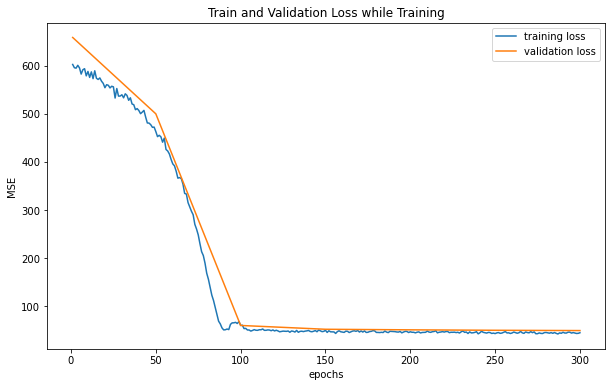

In [7]:
fl.plot_training_loss()

In [8]:
y_pred = fl.evaluation_metrics(x_test, y_test)

METRICS:
  Mean model Test MSE:  173.2198944091797
  Mean model Test RMSE: 13.161303520202637
  Model Test MSE:       49.35245132446289
  Model Test RMSE:      7.025130271911621


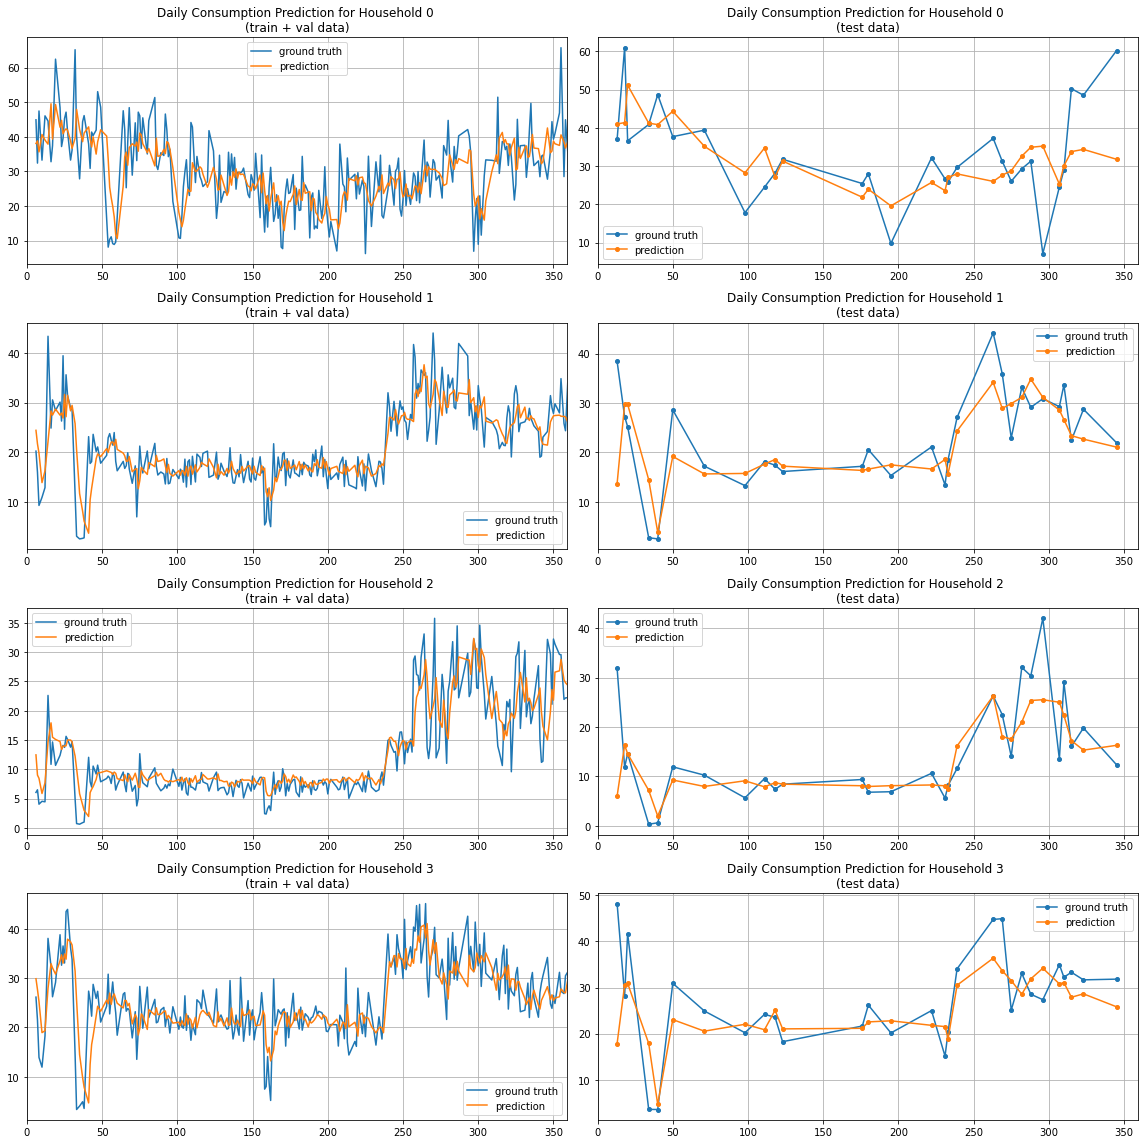

In [9]:
fl.plot_prediction_vs_label(x, y, train_idx, test_idx, val_idx, households=range(4))

## Run training with aggregated data

In [10]:
x, y, splits, indices = get_data(config, return_index=True)
x_train, x_val, x_test, y_train, y_val, y_test = splits
train_idx, test_idx, val_idx = indices

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [11]:
fl_agg = FederatedLearning(config)
fl_agg.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 619.92542, val loss: 674.95190
  Epoch: 50,  train loss: 479.02353, val loss: 521.17188
  Epoch: 100,  train loss: 51.19498, val loss: 54.02912
  Epoch: 150,  train loss: 51.76099, val loss: 51.56223
  Epoch: 200,  train loss: 45.26336, val loss: 50.89321
  Epoch: 250,  train loss: 58.55186, val loss: 50.55962
  Epoch: 300,  train loss: 59.22725, val loss: 50.21750
  Needed 0.02 minutes for training


### Analysis

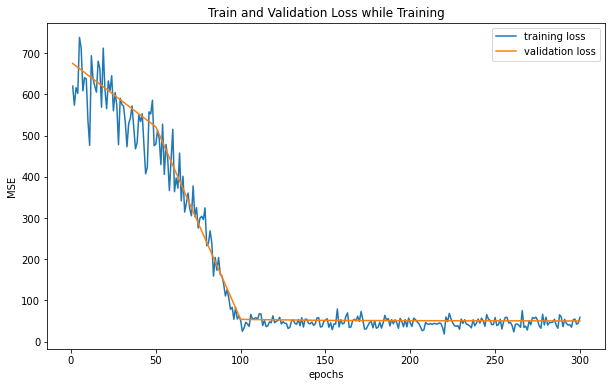

In [12]:
fl_agg.plot_training_loss()

In [13]:
y_pred = fl_agg.evaluation_metrics(x_test, y_test)

METRICS:
  Mean model Test MSE:  173.2198944091797
  Mean model Test RMSE: 13.161303520202637
  Model Test MSE:       50.05219268798828
  Model Test RMSE:      7.074757099151611


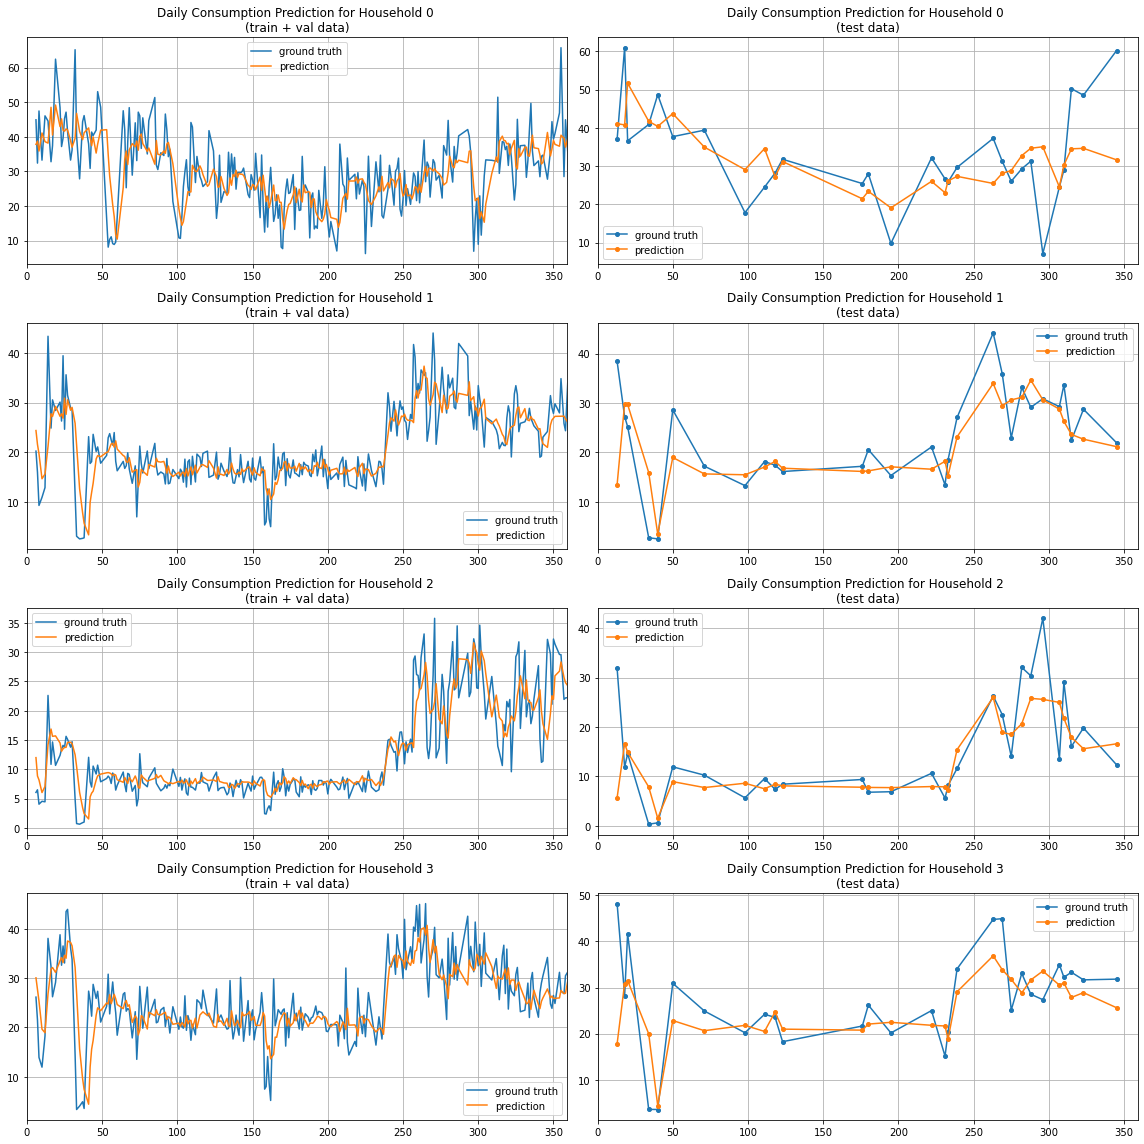

In [14]:
fl_agg.plot_prediction_vs_label(x, y, train_idx, test_idx, val_idx, households=range(4))